<a href="https://colab.research.google.com/github/xchen35/Sentiment-Analysis/blob/master/RNN_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import pandas as pd
import os
import time
import numpy as np
from keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import metrics
from keras.optimizers import RMSprop
from keras import backend as K
import matplotlib.pyplot as plt
from keras import layers

# **Experiment 1**
**Sentiment Analysis Using Rnn Model**

In [0]:
with open('/content/drive/My Drive/Complete.json') as f:
    json = json.load(f)
    
dict_1 = dict(json)

df = pd.DataFrame.from_dict(dict_1)

In [25]:
df.head()

,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
10,negative,"For the full-year 2018, Other Bets revenues we..."
100,neutral,Great. Thank you. I just wanted to follow up o...
1000,Neutral,Operator


In [0]:
for x in range(0, df.shape[0]):
    if df["sentiment"][x] == "positive":
        df["sentiment"][x] = 1
    elif df["sentiment"][x] == "negative":
        df["sentiment"][x] = -1
    else:
        df["sentiment"][x] = 0

In [0]:
X, Y = (df['text'].values, df['sentiment'].values)

In [0]:
df = df[df.sentiment != -1]

In [64]:
df.shape

(1325, 2)

In [0]:
tk = Tokenizer(num_words=300)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=300, padding='post')

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pad, Y, test_size = 0.2, random_state = 1)

In [0]:
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 200
embedding_size = 32
batch_size = 128

In [0]:
K.clear_session()
model = Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_size))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          178016    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 194,721
Trainable params: 194,721
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Train on 848 samples, validate on 212 samples
Epoch 1/20
848/848 [==============================] - 9s 11ms/step - loss: 0.6415 - acc: 0.5542 - val_loss: 0.5692 - val_acc: 0.5849
Epoch 2/20
848/848 [==============================] - 8s 10ms/step - loss: 0.5419 - acc: 0.5566 - val_loss: 0.5341 - val_acc: 0.5849
Epoch 3/20
848/848 [==============================] - 9s 10ms/step - loss: 0.5109 - acc: 0.5566 - val_loss: 0.5288 - val_acc: 0.5849
Epoch 4/20
848/848 [==============================] - 8s 10ms/step - loss: 0.4694 - acc: 0.5566 - val_loss: 0.5080 - val_acc: 0.5896
Epoch 5/20
848/848 [==============================] - 8s 10ms/step - loss: 0.4422 - acc: 0.5696 - val_loss: 0.4944 - val_acc: 0.5991
Epoch 6/20
848/848 [==============================] - 8s 9ms/step - loss: 0.4007 - acc: 0.5955 - val_loss: 0.5126 - val_acc: 0.6085
Epoch 7/20
848/848 [==============================] - 8s 9ms/step - loss: 0.3730 - acc: 0.6238 - val_loss: 0.5183 - val_acc: 0.5991
Epoch 8/20
848/848 [=====

In [71]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy", scores[1])

Test accuracy 0.6754716985630539


In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
actual = Y_test.astype(str).astype(int)

In [0]:
predicted = model.predict(X_test).argmax(axis=1)

In [80]:
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))

Confusion Matrix :
[[  0  20   0]
 [  0 141   0]
 [  0 104   0]]
Accuracy Score : 0.5320754716981132


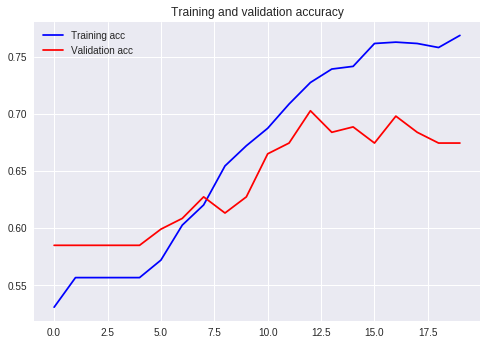

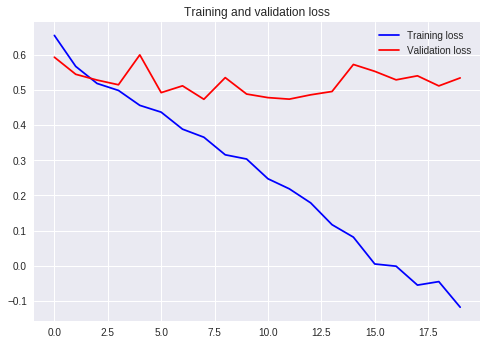

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epoch = range(len(acc))
 
plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#**Experiment 2**
**Transfer Learning IMDB Data**

In [0]:
from keras.datasets import imdb

In [0]:
# Number of words to consider as features
max_features = 5000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 300

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [0]:
from keras.preprocessing import sequence
# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [99]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 192s 10ms/step - loss: 0.5636 - acc: 0.7052 - val_loss: 0.4423 - val_acc: 0.8324
Epoch 2/10
20000/20000 [==============================] - 188s 9ms/step - loss: 0.3581 - acc: 0.8579 - val_loss: 0.3334 - val_acc: 0.8580
Epoch 3/10
20000/20000 [==============================] - 190s 10ms/step - loss: 0.3025 - acc: 0.8836 - val_loss: 0.3500 - val_acc: 0.8682
Epoch 4/10
20000/20000 [==============================] - 180s 9ms/step - loss: 0.2709 - acc: 0.8991 - val_loss: 0.3734 - val_acc: 0.8342
Epoch 5/10
20000/20000 [==============================] - 173s 9ms/step - loss: 0.2552 - acc: 0.9055 - val_loss: 0.3517 - val_acc: 0.8532
Epoch 6/10
20000/20000 [==============================] - 181s 9ms/step - loss: 0.2430 - acc: 0.9129 - val_loss: 0.3309 - val_acc: 0.8728
Epoch 7/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.2222 - acc: 0.9212 - val_loss: 0.4857 -

In [100]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy", scores[1])

Test accuracy 0.83788


In [101]:
actual = Y_test.astype(str).astype(int)
predicted = model.predict(X_test).argmax(axis=1)
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))

Confusion Matrix :
[[  0  20   0]
 [  0 141   0]
 [  0 104   0]]
Accuracy Score : 0.5320754716981132


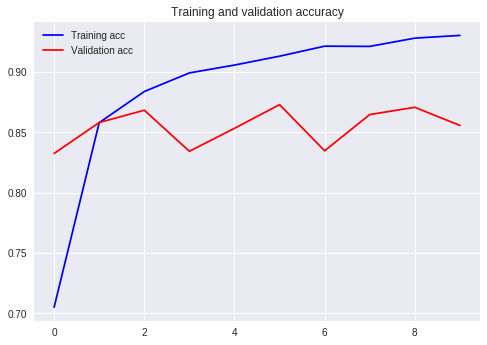

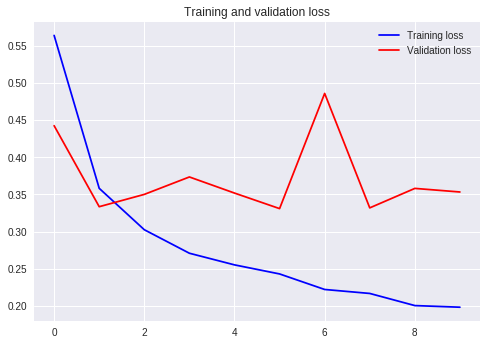

In [102]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epoch = range(len(acc))
 
plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
!pip install tpot

    100% |████████████████████████████████| 901kB 18.5MB/s 
    100% |████████████████████████████████| 942kB 19.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/86/5c/dd/c7673fbaccb901ec1a4eb79017fa5b65766805d2a98f954b9a
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot deap stopit


In [0]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

In [0]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [0]:
pipeline_optimizer.fit(x_train, y_train)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.6500000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=20,
        random_state=42, scoring=None, subsample=1.0, use_dask=False,
        verbosity=2, warm_start=False)

In [0]:
print(pipeline_optimizer.score(X_test, Y_test))

0.864406779661017
